In [33]:
import pandas_datareader as pdr

In [34]:
key='30aba41d9971d2f6366a8ba1f5ad4ea5fc71674e'

In [35]:
df=pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [36]:
df.to_csv('AAPL.csv')

In [37]:
import pandas as pd

In [38]:
df=pd.read_csv('AAPL.csv')

In [39]:
df1=df.reset_index()['close']

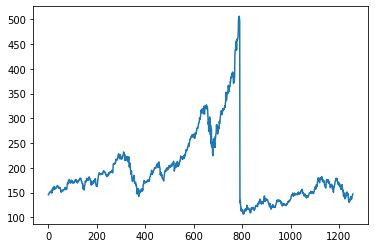

In [40]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [41]:
import numpy as np

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [43]:
df1

array([[0.0969067 ],
       [0.09743269],
       [0.10251722],
       ...,
       [0.09036944],
       [0.09896055],
       [0.10068879]])

In [44]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [45]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [46]:
time_step=100
X_train, Y_train=create_dataset(train_data, time_step)
X_test, Y_test=create_dataset(test_data, time_step)

In [47]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 21s 635ms/step - loss: 0.0391 - val_loss: 0.0027
Epoch 2/100
12/12 [==============================] - 4s 368ms/step - loss: 0.0143 - val_loss: 0.0083
Epoch 3/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0115 - val_loss: 7.1953e-04
Epoch 4/100
12/12 [==============================] - 4s 320ms/step - loss: 0.0094 - val_loss: 6.3968e-04
Epoch 5/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0086 - val_loss: 3.1497e-04
Epoch 6/100
12/12 [==============================] - 3s 281ms/step - loss: 0.0088 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 4s 350ms/step - loss: 0.0069 - val_loss: 9.2294e-04
Epoch 8/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0063 - val_loss: 3.9601e-04
Epoch 9/100
12/12 [==============================] - 4s 351ms/step - loss: 0.0060 - val_loss: 9.1959e-04
Epoch 10/100
12/12 [==============================] - 3s 263ms/ste

12/12 [==============================] - 4s 314ms/step - loss: 0.0013 - val_loss: 1.9541e-04
Epoch 79/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0014 - val_loss: 3.1374e-04
Epoch 80/100
12/12 [==============================] - 4s 347ms/step - loss: 0.0015 - val_loss: 2.3264e-04
Epoch 81/100
12/12 [==============================] - 3s 296ms/step - loss: 0.0017 - val_loss: 2.0982e-04
Epoch 82/100
12/12 [==============================] - 4s 320ms/step - loss: 0.0019 - val_loss: 3.4259e-04
Epoch 83/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0016 - val_loss: 2.0354e-04
Epoch 84/100
12/12 [==============================] - 4s 287ms/step - loss: 0.0015 - val_loss: 2.9578e-04
Epoch 85/100
12/12 [==============================] - 4s 337ms/step - loss: 0.0017 - val_loss: 4.1431e-04
Epoch 86/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0019 - val_loss: 2.5613e-04
Epoch 87/100
12/12 [==============================] - 4s 32

In [53]:
import tensorflow as tf

In [55]:
tf.__version__

'2.8.0'

In [54]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [56]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

238.84270589259293

In [60]:
math.sqrt(mean_squared_error(Y_test, test_predict))

154.7463260398713

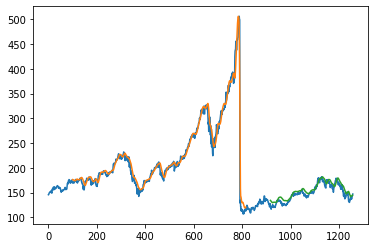

In [61]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.09887923]
101
1 day input [0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387
 0.17765811 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021
 0.16355667 0.15842204 0.14755166 0.15233563 0.1591985  0.1463995
 0.14584847 0.15168441 0.15125861 0.14922981 0.13763306 0.14036318
 0.12513463 0.12455855 0.14226675 0.12726362 0.12804008 0.13184721
 0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.0

9 day output [[0.12031749]]
10 day input [0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757

20 day output [[0.14273377]]
21 day input [0.13212273 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226
 0.16839073 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327
 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204
 0.14755166 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441
 0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.09887923 0.10133994 0.10385045 0.10634179 0.10878804
 0.11118355 0.1135304

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

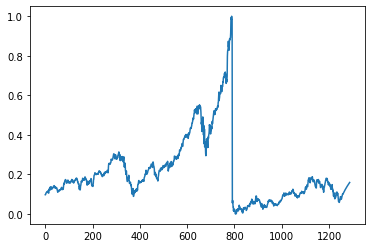

In [84]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[:])

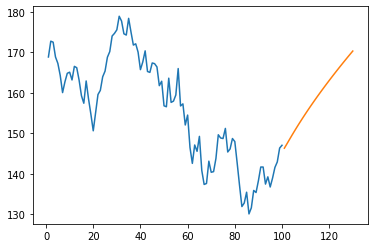

In [72]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))